In [ ]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import random as rd
from sympy.utilities.iterables import multiset_permutations
import sympy 

In [ ]:
def f(x):
  aux=B.dot(x)
  return np.var(aux[aux!=0])

In [ ]:
def orden(i,j,N):
  t=0;
  for s in range(N):
    for k in range(N):
      if s==i and k==j:
        return t
      else:
        t+=1
  return 0
  
def condicionada(i,j,mu,M):
  prob=0
  n=len(mu)
  t=0
  for h in range(n):
    if M[orden(i,j,N)][t]==1:
      prob+=mu[t]
    else:
      M=np.delete(M,int(t),1)
      mu=np.delete(mu,int(t),0)
      t=t-1
      #print(len(mu))
    t+=1
  for t in range(len(mu)):
    mu[t]=mu[t]/prob
  return mu,M

In [ ]:
N=8
#val=np.array([[0,1,1,1,1,1,1,0],[1,0,1,1,1,1,1,0],[1,1,0,1,1,1,1,1],[1,0,1,0,1,0,1,1],[1,1,1,1,0,1,1,1],[1,1,1,1,1,0,1,0],[0,1,1,1,1,1,0,1],[1,1,1,0,1,1,1,0]])
#Año 2021
val=np.array([[0,0,1,1,1,1,1,0],[0,0,1,1,0,1,1,1],[1,1,0,1,1,1,1,1],[1,1,1,0,1,1,1,1],[1,1,1,1,0,1,1,1],[1,0,1,1,1,0,1,0],[1,1,1,1,1,0,0,1],[1,1,1,1,1,1,1,0]])

A_aux=np.zeros(N)
B=np.zeros((N*N,4781))
B=np.zeros((N*N,4572))
N_posib=0
a = np.array([1,2,3,4,5,6,7,8])
#a = np.array([1,2,3])
for p in multiset_permutations(a):
  sirve=1
  for i in range(N):
    if val[p[i]-1,i]!=1:
      sirve=0
  if sirve:
    for i in range(N):
      B[(p[i]-1)*N+i,N_posib]=1
    N_posib=N_posib+1

In [ ]:
tam_mu=4781
tam_mu=4572
sol=np.ones(tam_mu)/tam_mu
it_max=100000000
tol=0.1
eps=1
it=0
change=0.000001
P_acep=0.005

while it<it_max:
  it=it+1
  x=rd.randint(0,tam_mu-1)
  y=rd.randint(0,tam_mu-1)
  if x!=y:
    posible_sol=np.copy(sol)
    posible_sol[x]=posible_sol[x]+change
    posible_sol[y]=posible_sol[y]-change
    if posible_sol[x]>0 and posible_sol[y]>0:
      if f(posible_sol)<=f(sol):
        sol[x]=posible_sol[x]
        sol[y]=posible_sol[y]
      elif rd.random()<P_acep:
        sol[x]=posible_sol[x]
        sol[y]=posible_sol[y]


KeyboardInterrupt: ignored

In [ ]:
vec_P=np.matmul(B,sol)
count=0
P=np.zeros((8,8))
for i in range(N):
  for j in range(N):
      P[i,j]=vec_P[count]
      count=count+1
np.size(P[P==0])

15

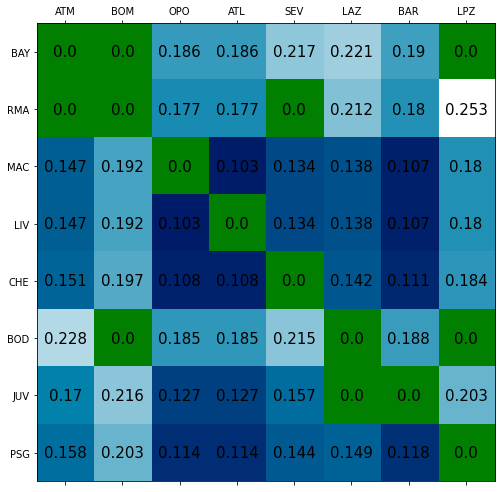

In [ ]:
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()
ax.matshow(P, cmap='ocean')

for i in range(N):
   for j in range(N):
      c = round(P[j, i],3)
      ax.text(i, j, str(c), va='center', ha='center',size=15)
 
ax.xaxis.set_ticklabels(['','ATM','BOM','OPO','ATL','SEV','LAZ','BAR','LPZ']); ax.yaxis.set_ticklabels(['','BAY','RMA','MAC','LIV','CHE','BOD','JUV','PSG']);
plt.show()
fig.savefig("Estocast_var_2020.pdf")

In [ ]:
eps

In [ ]:
fig, ax = plt.subplots()
plt.bar(np.linspace(0,4781,4781),sol)
ax.set_xlabel('Combinación',size=15);ax.set_ylabel('Probabilidad',size=15); 
fig.savefig("Densidad_prob_var.pdf")
plt.show()

In [ ]:
f(sol)